<a href="https://colab.research.google.com/github/saritdi/PlantClassification/blob/main/Sarit_My_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Stage 1: Install dependencies and setting up GPU environment
!pip install tensorflow-gpu==2.3.0

     |████████████████████████████████| 320.4MB 51kB/s 
     |████████████████████████████████| 20.1MB 13.3MB/s 
     |████████████████████████████████| 460kB 52.6MB/s 
ERROR: tensorflow 2.4.0 has requirement numpy~=1.19.2, but you'll have numpy 1.18.5 which is incompatible.
ERROR: tensorflow 2.4.0 has requirement tensorflow-estimator<2.5.0,>=2.4.0rc0, but you'll have tensorflow-estimator 2.3.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0


In [ ]:
# Importing a library that is not in Colaboratory
!apt-get -qq install -y libfluidsynth1
!pip install matplotlib-venn

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 145483 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
!pip install tqdm

In [ ]:
# Dataset preprocessing
# Import project dependencies
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

%matplotlib inline
tf.__version__

'2.3.0'

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
  # Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# import pathlib
# flower_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# flower_data_dir = tf.keras.utils.get_file('flower_photos', origin=flower_dataset_url, untar=True, extract=True, archive_format='zip', cache_dir="/content")
# flower_data_dir = pathlib.Path(flower_data_dir)
# tf.io.gfile.remove('/content/datasets/flower_photos/LICENSE.txt')
# print(os.listdir(flower_data_dir))

In [ ]:
# Setting up data import for google Drive
# Training data
fid = drive.ListFile({'q':"title='MyHousePlants.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('MyHousePlants.zip')

# Testing data
fid1 = drive.ListFile({'q':"title='Test.zip'"}).GetList()[0]['id']
f1 = drive.CreateFile({'id': fid1})
f1.GetContentFile('Test.zip')




In [ ]:
f.keys()

dict_keys(['id', 'kind', 'etag', 'selfLink', 'webContentLink', 'alternateLink', 'embedLink', 'iconLink', 'title', 'mimeType', 'labels', 'copyRequiresWriterPermission', 'createdDate', 'modifiedDate', 'modifiedByMeDate', 'lastViewedByMeDate', 'markedViewedByMeDate', 'version', 'parents', 'downloadUrl', 'userPermission', 'originalFilename', 'fileExtension', 'md5Checksum', 'fileSize', 'quotaBytesUsed', 'ownerNames', 'owners', 'lastModifyingUserName', 'lastModifyingUser', 'capabilities', 'editable', 'copyable', 'writersCanShare', 'shared', 'explicitlyTrashed', 'appDataContents', 'headRevisionId', 'spaces'])

In [ ]:
f1.keys()

dict_keys(['id', 'kind', 'etag', 'selfLink', 'webContentLink', 'alternateLink', 'embedLink', 'iconLink', 'title', 'mimeType', 'labels', 'copyRequiresWriterPermission', 'createdDate', 'modifiedDate', 'modifiedByMeDate', 'lastViewedByMeDate', 'markedViewedByMeDate', 'version', 'parents', 'downloadUrl', 'userPermission', 'originalFilename', 'fileExtension', 'md5Checksum', 'fileSize', 'quotaBytesUsed', 'ownerNames', 'owners', 'lastModifyingUserName', 'lastModifyingUser', 'capabilities', 'editable', 'copyable', 'writersCanShare', 'shared', 'explicitlyTrashed', 'appDataContents', 'headRevisionId', 'spaces'])

In [ ]:
!unzip MyHousePlants.zip

Archive:  MyHousePlants.zip
   creating: MyHousePlants/
   creating: MyHousePlants/Bamboo/
  inflating: MyHousePlants/Bamboo/IMG_0959.JPG  
  inflating: MyHousePlants/Bamboo/IMG_0960.JPG  
  inflating: MyHousePlants/Bamboo/IMG_0961.JPG  
  inflating: MyHousePlants/Bamboo/IMG_0962.JPG  
  inflating: MyHousePlants/Bamboo/IMG_0963.JPG  
  inflating: MyHousePlants/Bamboo/IMG_0964.JPG  
  inflating: MyHousePlants/Bamboo/IMG_0965.JPG  
  inflating: MyHousePlants/Bamboo/IMG_0966.JPG  
  inflating: MyHousePlants/Bamboo/IMG_0967.JPG  
  inflating: MyHousePlants/Bamboo/IMG_0968.JPG  
  inflating: MyHousePlants/Bamboo/IMG_0969.JPG  
  inflating: MyHousePlants/Bamboo/IMG_0970.JPG  
  inflating: MyHousePlants/Bamboo/IMG_0971.JPG  
  inflating: MyHousePlants/Bamboo/IMG_0972.JPG  
  inflating: MyHousePlants/Bamboo/IMG_0973.JPG  
  inflating: MyHousePlants/Bamboo/IMG_0974.JPG  
  inflating: MyHousePlants/Bamboo/IMG_0975.JPG  
  inflating: MyHousePlants/Bamboo/IMG_0976.JPG  
  inflating: MyHousePlants/

In [ ]:
!unzip Test.zip

Archive:  Test.zip
   creating: Test/
   creating: Test/Bamboo/
  inflating: Test/Bamboo/IMG_1235.JPG  
  inflating: Test/Bamboo/IMG_1236.JPG  
  inflating: Test/Bamboo/IMG_1237.JPG  
  inflating: Test/Bamboo/IMG_1238.JPG  
  inflating: Test/Bamboo/IMG_1239.JPG  
   creating: Test/Fittonia Verschaffeltii/
  inflating: Test/Fittonia Verschaffeltii/IMG_1215.JPG  
  inflating: Test/Fittonia Verschaffeltii/IMG_1216.JPG  
  inflating: Test/Fittonia Verschaffeltii/IMG_1217.JPG  
  inflating: Test/Fittonia Verschaffeltii/IMG_1218.JPG  
  inflating: Test/Fittonia Verschaffeltii/IMG_1219.JPG  
   creating: Test/Jade Plant/
  inflating: Test/Jade Plant/IMG_1296.JPG  
  inflating: Test/Jade Plant/IMG_1303.JPG  
  inflating: Test/Jade Plant/IMG_1311.JPG  
  inflating: Test/Jade Plant/IMG_1336.JPG  
  inflating: Test/Jade Plant/IMG_1338.JPG  
  inflating: Test/Jade Plant/IMG_1342.JPG  
  inflating: Test/Jade Plant/IMG_1391.JPG  
  inflating: Test/Jade Plant/IMG_1411.JPG  
  inflating: Test/Jade Pla

In [ ]:
PATH = '/content'
os.listdir(PATH)

['.config',
 'Test',
 'MyHousePlants.zip',
 'Test.zip',
 'MyHousePlants',
 'adc.json',
 'sample_data']

In [ ]:
train_data_dir = os.path.join(PATH,'MyHousePlants')
test_data_dir = os.path.join(PATH,'Test')
print(os.listdir(train_data_dir))

['Zebra Plant', 'Jade Plant', 'Sempervivum', 'Bamboo', 'Fittonia Verschaffeltii', 'String Of Banana', 'Padded Plant', 'Parlor Palm', 'Moon Cactus', 'Sansevieria Ballyi']


In [ ]:
print(os.listdir(test_data_dir))

['Zebra Plant', 'Jade Plant', 'Sempervivum', 'Bamboo', 'Fittonia Verschaffeltii', 'String Of Banana', 'Padded Plant', 'Parlor Palm', 'Moon Cactus', 'Sansevieria Ballyi']


In [ ]:
# Preparing the data
IMG_HEIGHT = 128
IMG_WIDTH = 128
batch_size = 32

# # Image normalization

# # 255.0 is the highest pixel value
image_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
    )

train_data_generator = image_generator.flow_from_directory(
    directory=train_data_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    subset="training",
    class_mode='sparse')

valid_data_generator = image_generator.flow_from_directory(
    directory=train_data_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    subset="validation",
    class_mode='sparse')

test_data_generator = image_generator.flow_from_directory(
    directory=test_data_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'sparse')

# train_flower_data_generator = image_generator.flow_from_directory(
#     directory=flower_data_dir,
#     shuffle=True,
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     subset="training",
#     class_mode='sparse')

# valid_flower_data_generator = image_generator.flow_from_directory(
#     directory=flower_data_dir,
#     shuffle=True,
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     subset="validation",
#     class_mode='sparse')


class_names = list(train_data_generator.class_indices.keys())

Found 640 images belonging to 10 classes.
Found 154 images belonging to 10 classes.
Found 65 images belonging to 10 classes.


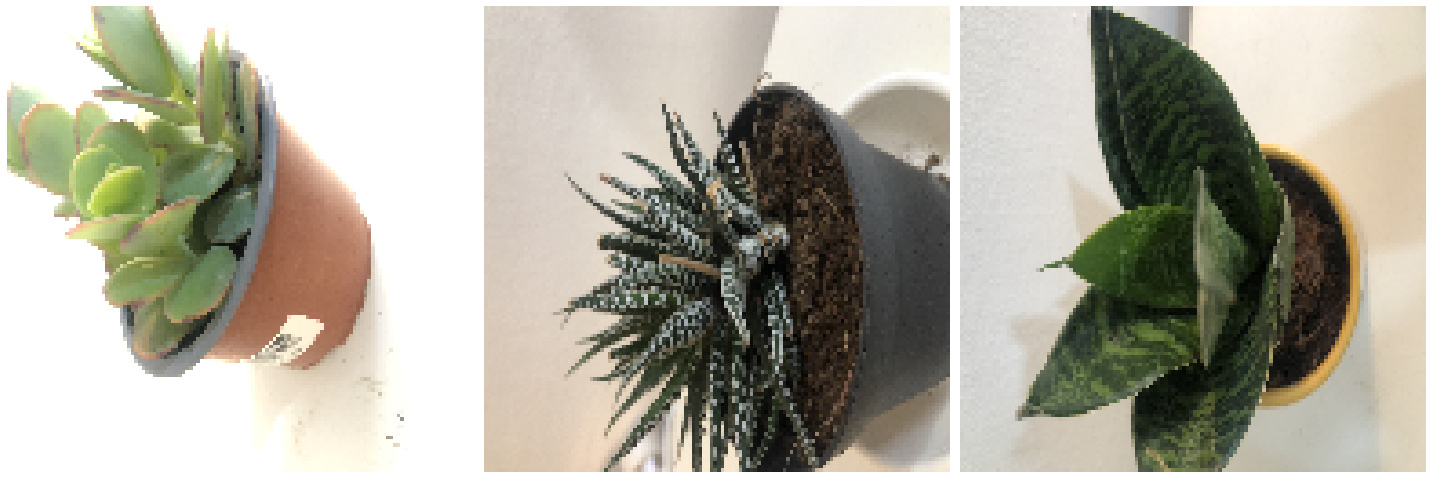

In [ ]:
# This function will plot images in the form of a grid with 1 row and 3 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(train_data_generator)
plotImages(sample_training_images[:3])

In [ ]:
# Loading the pre-trained model (MobileNetV2)
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")


In [ ]:
# Freezing the base model
# base_model.shape=(None, 4, 4, 1280) - too big
base_model.trainable = False
print(base_model.output)
# takes the whole input instead of taking parts at a time
# takes an average of numbers in an input = output of the base_model
# convert features to vectors
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
print(global_average_layer)
prediction_layer = tf.keras.layers.Dense(units=10, activation='sigmoid')(global_average_layer)
print(prediction_layer)

Tensor("out_relu/Relu6_1:0", shape=(None, 4, 4, 1280), dtype=float32)
Tensor("global_average_pooling2d_1/Mean:0", shape=(None, 1280), dtype=float32)
Tensor("dense_1/Sigmoid:0", shape=(None, 10), dtype=float32)


In [ ]:
# Defining the model
# Combining two models
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss="sparse_categorical_crossentropy", metrics=["SparseCategoricalAccuracy"])


In [ ]:
train = train_data_generator
valid = valid_data_generator
epochs = 20
history = model.fit(train,  
                    epochs = epochs, 
                    validation_data=valid)

Epoch 1/20
20/20 [==============================] - 122s 6s/step - loss: 2.2185 - sparse_categorical_accuracy: 0.2078 - val_loss: 2.0792 - val_sparse_categorical_accuracy: 0.2143
Epoch 2/20
20/20 [==============================] - 116s 6s/step - loss: 1.9173 - sparse_categorical_accuracy: 0.3781 - val_loss: 1.8735 - val_sparse_categorical_accuracy: 0.3831
Epoch 3/20
20/20 [==============================] - 116s 6s/step - loss: 1.6395 - sparse_categorical_accuracy: 0.5656 - val_loss: 1.6560 - val_sparse_categorical_accuracy: 0.5584
Epoch 4/20
20/20 [==============================] - 117s 6s/step - loss: 1.3577 - sparse_categorical_accuracy: 0.7203 - val_loss: 1.4290 - val_sparse_categorical_accuracy: 0.6299
Epoch 5/20
20/20 [==============================] - 117s 6s/step - loss: 1.0829 - sparse_categorical_accuracy: 0.8250 - val_loss: 1.2098 - val_sparse_categorical_accuracy: 0.7532
Epoch 6/20
20/20 [==============================] - 118s 6s/step - loss: 0.8393 - sparse_categorical_accu

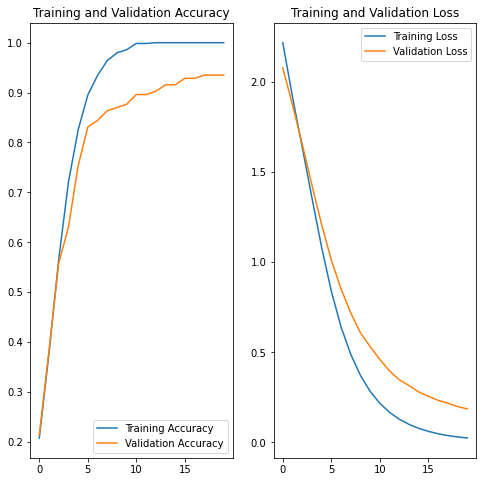

In [ ]:
import plotly.graph_objects as go

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
valid_loss, valid_accuracy = model.evaluate(valid)

5/5 [==============================] - 18s 4s/step - loss: 0.1856 - sparse_categorical_accuracy: 0.9351


In [ ]:
print("Accuracy after transfer learning: {}".format(valid_accuracy))

Accuracy after transfer learning: 0.9350649118423462


In [ ]:
test_accu = model.evaluate(test_data_generator)
print('The testing accuracy is :',test_accu[1]*100, '%')
test = test_data_generator
test_images, test_labels  = next(test)
test_labels = list(_)
test_labels = [int(i) for i in test_labels]



3/3 [==============================] - 5s 2s/step - loss: 0.1958 - sparse_categorical_accuracy: 0.9385
The testing accuracy is : 93.84615421295166 %


In [ ]:
#plant_path = 'https://en.wikipedia.org/wiki/Helianthus#/media/File:Sunflower_sky_backdrop.jpg'
flower_path = '/content/Test/Fittonia Verschaffeltii/IMG_1215.JPG'
img = tf.keras.preprocessing.image.load_img(flower_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to Fittonia Verschaffeltii with a 10.27 percent confidence.


In [ ]:
base_model.trainable = True

In [ ]:
print("Number of layersin the base model: {}".format(len(base_model.layers)))

Number of layersin the base model: 155


In [ ]:
fine_tune_at = 100

In [ ]:
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False


In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train = train_data_generator
valid = valid_data_generator
epochs = 20
history = model.fit(train,  
                    epochs = epochs, 
                    validation_data=valid)

Epoch 1/20
20/20 [==============================] - 124s 6s/step - loss: 0.0664 - accuracy: 0.9953 - val_loss: 0.0968 - val_accuracy: 0.9610
Epoch 2/20
20/20 [==============================] - 118s 6s/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0895 - val_accuracy: 0.9675
Epoch 3/20
20/20 [==============================] - 120s 6s/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0739 - val_accuracy: 0.9805
Epoch 4/20
20/20 [==============================] - 117s 6s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0497 - val_accuracy: 0.9935
Epoch 5/20
20/20 [==============================] - 117s 6s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0362 - val_accuracy: 0.9935
Epoch 6/20
20/20 [==============================] - 118s 6s/step - loss: 6.2209e-04 - accuracy: 1.0000 - val_loss: 0.0263 - val_accuracy: 0.9935
Epoch 7/20
20/20 [==============================] - 117s 6s/step - loss: 3.0870e-04 - accuracy: 1.0000 - val_loss: 0.0243 - val_accuracy: 0.9935
Epoch

In [ ]:
valid_loss, valid_accuracy = model.evaluate(valid)

5/5 [==============================] - 19s 4s/step - loss: 0.0034 - accuracy: 1.0000


In [ ]:
print("Validation accuracy after fine tuning: {}".format(valid_accuracy))

Validation accuracy after fine tuning: 1.0


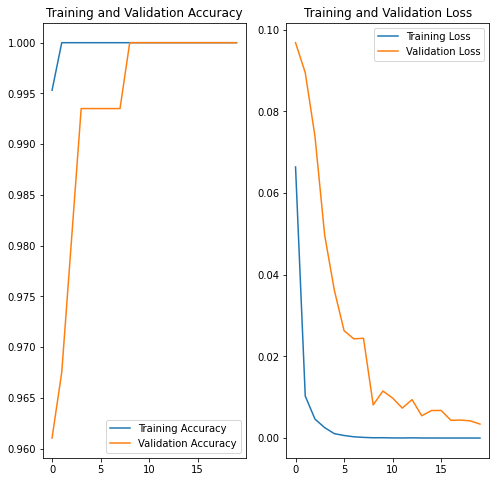

In [ ]:
import plotly.graph_objects as go

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_accu = model.evaluate(test_data_generator)
print('The testing accuracy is :',test_accu[1]*100, '%')


3/3 [==============================] - 5s 2s/step - loss: 0.0640 - accuracy: 0.9692
The testing accuracy is : 96.92307710647583 %


In [ ]:
#plant_path = 'https://en.wikipedia.org/wiki/Helianthus#/media/File:Sunflower_sky_backdrop.jpg'
flower_path = '/content/Test/Padded Plant/IMG_1781.JPG'
img = tf.keras.preprocessing.image.load_img(flower_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
#img_array = tf.keras.preprocessing.image.smart_resize()
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions)

class_names = test_data_generator.class_indices
print(class_names)
# function to return key for any value
def get_key(val):
    for key, value in class_names.items():
         if val == value:
             return key
 
    return "key doesn't exist"
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(get_key(np.argmax(predictions)), 100 * np.max(score))
)


{'Bamboo': 0, 'Fittonia Verschaffeltii': 1, 'Jade Plant': 2, 'Moon Cactus': 3, 'Padded Plant': 4, 'Parlor Palm': 5, 'Sansevieria Ballyi': 6, 'Sempervivum': 7, 'String Of Banana': 8, 'Zebra Plant': 9}
This image most likely belongs to Padded Plant with a 23.08 percent confidence.


In [ ]:
# Save my model
# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors,
# and stored with the default serving key
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/1

INFO:tensorflow:Assets written to: /tmp/1/assets

Saved model:
total 3136
drwxr-xr-x 2 root root    4096 Jan 16 14:16 assets
-rw-r--r-- 1 root root 3200178 Jan 16 17:13 saved_model.pb
drwxr-xr-x 2 root root    4096 Jan 16 17:13 variables


In [ ]:
# Examine your saved model
!saved_model_cli show --dir {export_path} --all

2021-01-16 17:13:32.467783: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_2'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 128, 128, 3)
        name: serving_default_input_2:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow

In [ ]:
# Serve your model with TensorFlow Serving

# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  28852      0 --:--:-- --:--:-- --:--:-- 29138
OK
Hit:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/

In [ ]:
# Install TensorFlow Serving
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tensorflow-model-server is already the newest version (2.4.0).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.


### Start running TensorFlow Serving

This is where we start running TensorFlow Serving and load our model.  After it loads we can start making inference requests using REST.  There are some important parameters:

* `rest_api_port`: The port that you'll use for REST requests.
* `model_name`: You'll use this in the URL of REST requests.  It can be anything.
* `model_base_path`: This is the path to the directory where you've saved your model.


In [ ]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [ ]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=PlantIL_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1


Starting job # 3 in a separate thread.


In [ ]:
!tail server.log

2021-01-16 17:13:46.017142: I tensorflow_serving/model_servers/server.cc:88] Building single TensorFlow model file config:  model_name: PlantIL_model model_base_path: /tmp
2021-01-16 17:13:46.017344: I tensorflow_serving/model_servers/server_core.cc:464] Adding/updating models.
2021-01-16 17:13:46.017370: I tensorflow_serving/model_servers/server_core.cc:587]  (Re-)adding model: PlantIL_model


## Make a request to your model in TensorFlow Serving

First, let's take a look at a random example from our test data.

['Bamboo', 'Fittonia Verschaffeltii', 'Jade Plant', 'Moon Cactus', 'Padded Plant', 'Parlor Palm', 'Sansevieria Ballyi', 'Sempervivum', 'String Of Banana', 'Zebra Plant']


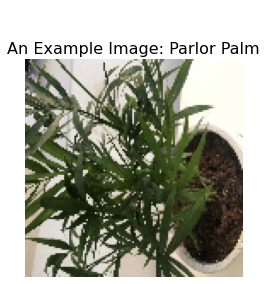

In [ ]:
test = test_data_generator
test_images, test_labels  = next(test)
test_labels = [int(i) for i in list(test_labels)]
class_names = list(test_data_generator.class_indices.keys())
print(class_names)

def show(idx, title):
  plt.figure()
  plt.imshow(test_images[idx])
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

import random
rando = random.randint(0,len(test_images)-1)
show(rando, 'An Example Image: {}'.format(class_names[test_labels[rando]]))

Data: {"signature_name": "serving_default", "instances": ... 8027344, 0.7019608020782471, 0.6000000238418579]]]]}
[0.00420585275, 0.000457048416, 0.999362707, 0.00109148026, 0.000183433294, 0.00181844831, 0.00247609615, 0.00393399596, 0.000868648291, 0.00275138021]
2


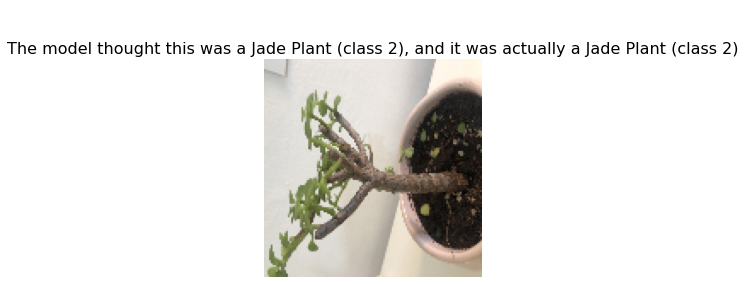

In [ ]:
import json
test = test_data_generator
test_images, test_labels  = next(test)
test_labels = [int(i) for i in list(test_labels)]
data = json.dumps({"signature_name": "serving_default", "instances": test_images[0:10].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

!pip install -q requests

import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/PlantIL_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']
print(predictions[0])
print(np.argmax(predictions[0]))

show(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
  class_names[np.argmax(predictions[0])], np.argmax(predictions[0]), class_names[test_labels[0]], test_labels[0]))

In [ ]:
model.save('/content/PlantModelSarit.h5')
# model.save('/content/my_model')
#model.save('/content/keras.json')
# temp = 'PlantModelSarit.h5'
# model.save_weights('/content/weights.bin')
# with open(temp, 'rb') as f:
#     weightbytes = f.read()
#     print(weightbytes)


In [ ]:
!pip install tensorflowjs 

In [ ]:
!mkdir my_plant_model


In [ ]:
!tensorflowjs_converter --input_format=keras /content/keras.h5 /content/model


In [ ]:
!zip -r model.zip my_model 

In [ ]:
!tensorflowjs_converter --input_format keras --weight_shard_size_bytes 60000000 